product_category
Electronics    267
Fashion        263
Grocery        259
Home           211
Name: count, dtype: int64


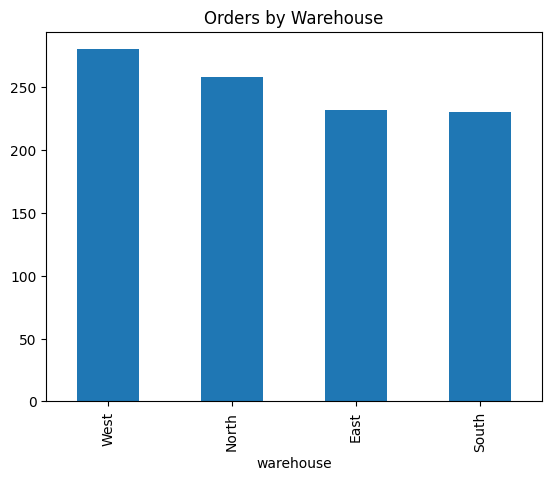

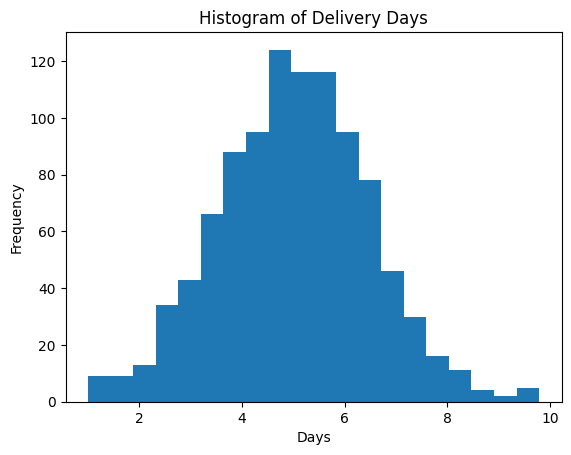

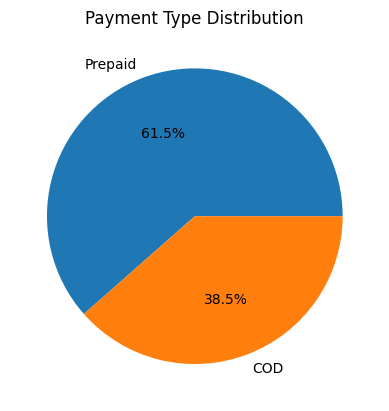

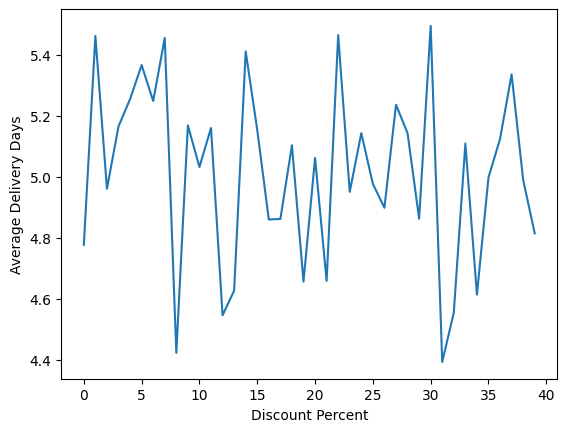

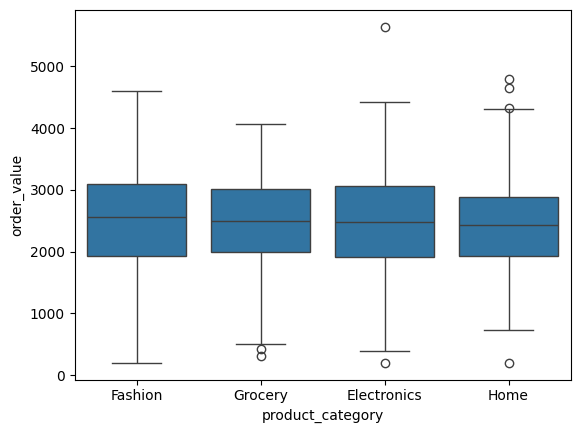

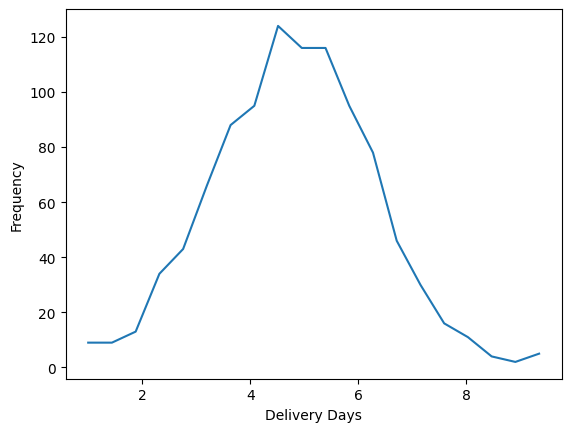

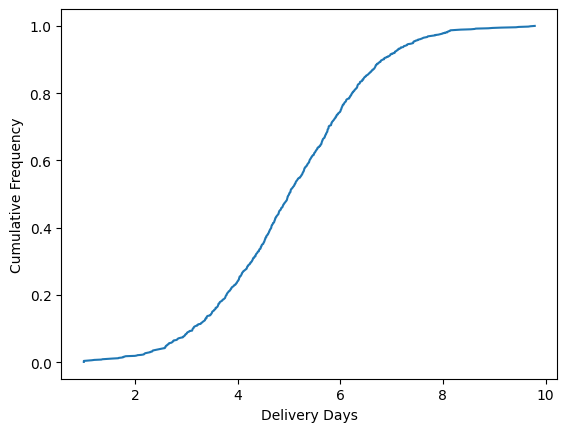

Mean: 5.0207684623484345
Median: 5.0013000756641155
Mode: 1.0
Weighted Mean Order Value: 2536.1418328649606
Combined Mean Delivery Days: 5.043009051751788
Range: 8.789661351767291
Variance: 2.141066516878888
Standard Deviation: 1.4632383663910977
IQR: 1.978802278028093
Coefficient of Variation: 0.291437133053269
warehouse
East     1.501112
North    1.411036
South    1.474000
West     1.470634
Name: delivery_days, dtype: float64
Skewness: -0.026328388130717847
Kurtosis: -0.08875761795717363


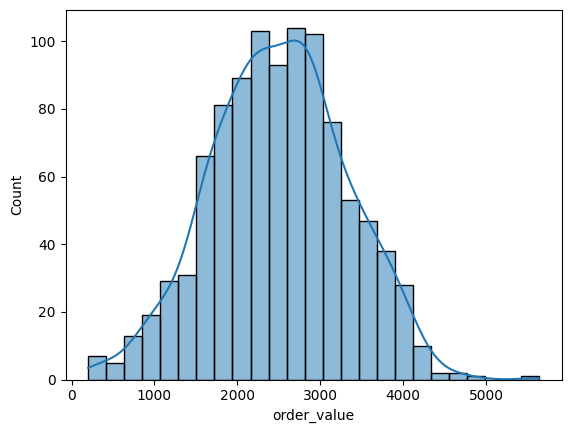

Pearson Correlation: 0.07142441026189895
Spearman Correlation: -0.036116365663016375


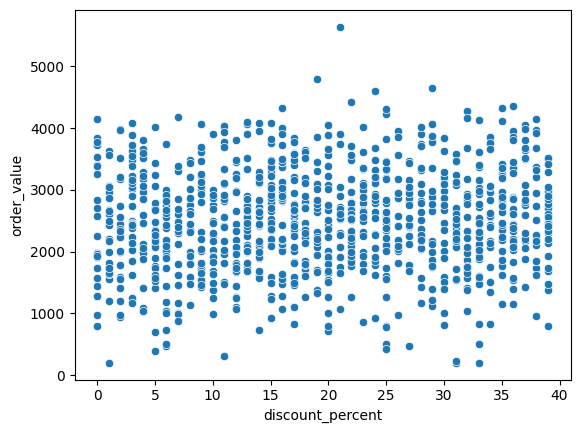

Intercept: 2402.0065748126317
Slope: 5.17548372433355
Predicted Order Value (20% discount): 2505.5162492993027
P(Returned): 0.149
P(Prepaid AND Not Returned): 0.528
Binomial Probability: 0.08267888909830245
Poisson Probability: 0.10419563456702102
P(Delivery > 7 days): 0.08808568375102022


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipython-input-3231269618.py:295: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(lambda x: x.sample(25))


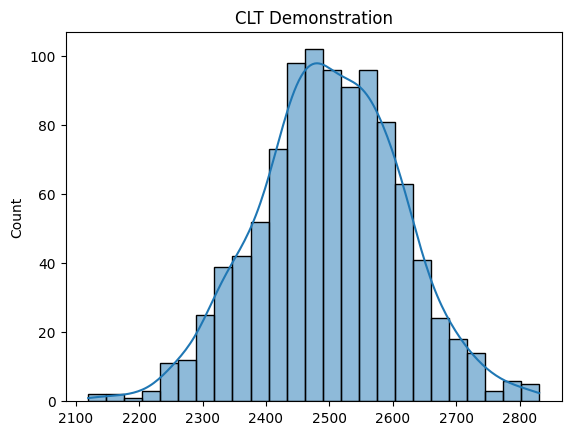

Standard Error: 0.04627165997539842


In [1]:
# =========================================
# IMPORT REQUIRED LIBRARIES
# =========================================

import numpy as np                      # Numerical computations
import pandas as pd                     # Data handling and manipulation
import matplotlib.pyplot as plt          # Basic plotting
import seaborn as sns                   # Advanced statistical plots
from scipy import stats                 # Statistical functions
from sklearn.linear_model import LinearRegression  # Regression model

# =========================================
# SET RANDOM SEED FOR REPRODUCIBILITY
# =========================================

np.random.seed(42)

# =========================================
# DATA GENERATION
# =========================================

n = 1000                                # Number of observations (orders)

data = pd.DataFrame({

    # Unique order IDs
    "order_id": range(1, n + 1),

    # Random warehouse assignment
    "warehouse": np.random.choice(
        ["North", "South", "East", "West"], n
    ),

    # Product categories
    "product_category": np.random.choice(
        ["Electronics", "Fashion", "Grocery", "Home"], n
    ),

    # Payment type with probabilities
    "payment_type": np.random.choice(
        ["COD", "Prepaid"], n, p=[0.4, 0.6]
    ),

    # Delivery days generated using normal distribution
    "delivery_days": np.random.normal(5, 1.5, n).clip(1),

    # Order value with minimum ₹200
    "order_value": np.random.normal(2500, 800, n).clip(200),

    # Discount percent
    "discount_percent": np.random.randint(0, 40, n),

    # Customer ratings (ordinal)
    "customer_rating": np.random.randint(1, 6, n),

    # Returned or not
    "returned": np.random.choice(
        ["Yes", "No"], n, p=[0.15, 0.85]
    )
})

# =========================================
# DATA PREPARATION
# =========================================

# Convert returned column into binary values
data["returned_binary"] = data["returned"].map({"Yes": 1, "No": 0})

# =========================================
# FREQUENCY DISTRIBUTIONS
# =========================================

# Product category frequency
print(data["product_category"].value_counts())

# =========================================
# DATA VISUALIZATION
# =========================================

# Bar chart: Orders by warehouse
data["warehouse"].value_counts().plot(kind="bar")
plt.title("Orders by Warehouse")
plt.show()

# Histogram: Delivery days
plt.hist(data["delivery_days"], bins=20)
plt.title("Histogram of Delivery Days")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# Pie chart: Payment type
data["payment_type"].value_counts().plot(
    kind="pie", autopct="%1.1f%%"
)
plt.ylabel("")
plt.title("Payment Type Distribution")
plt.show()

# Line graph: Average delivery days vs discount percent
avg_delivery = data.groupby("discount_percent")["delivery_days"].mean()
plt.plot(avg_delivery)
plt.xlabel("Discount Percent")
plt.ylabel("Average Delivery Days")
plt.show()

# Boxplot: Order value by product category
sns.boxplot(
    x="product_category",
    y="order_value",
    data=data
)
plt.show()

# Frequency polygon: Delivery days
counts, bins = np.histogram(data["delivery_days"], bins=20)
plt.plot(bins[:-1], counts)
plt.xlabel("Delivery Days")
plt.ylabel("Frequency")
plt.show()

# Ogive (cumulative frequency curve)
sorted_days = np.sort(data["delivery_days"])
cum_freq = np.arange(1, n + 1) / n
plt.plot(sorted_days, cum_freq)
plt.xlabel("Delivery Days")
plt.ylabel("Cumulative Frequency")
plt.show()

# =========================================
# MEASURES OF CENTRAL TENDENCY
# =========================================

mean_days = data["delivery_days"].mean()
median_days = data["delivery_days"].median()
mode_days = data["delivery_days"].mode()[0]

print("Mean:", mean_days)
print("Median:", median_days)
print("Mode:", mode_days)

# =========================================
# WEIGHTED MEAN
# =========================================

weighted_mean = np.average(
    data["order_value"],
    weights=data["discount_percent"]
)
print("Weighted Mean Order Value:", weighted_mean)

# =========================================
# COMBINED MEAN (NORTH + SOUTH)
# =========================================

ns_data = data[data["warehouse"].isin(["North", "South"])]
print("Combined Mean Delivery Days:", ns_data["delivery_days"].mean())

# =========================================
# MEASURES OF DISPERSION
# =========================================

range_days = data["delivery_days"].max() - data["delivery_days"].min()
variance_days = data["delivery_days"].var()
std_days = data["delivery_days"].std()

print("Range:", range_days)
print("Variance:", variance_days)
print("Standard Deviation:", std_days)

# Interquartile Range
Q1 = data["delivery_days"].quantile(0.25)
Q3 = data["delivery_days"].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

# Coefficient of Variation
CV = std_days / mean_days
print("Coefficient of Variation:", CV)

# Most consistent warehouse
print(
    data.groupby("warehouse")["delivery_days"].std()
)

# =========================================
# SKEWNESS AND KURTOSIS
# =========================================

print("Skewness:", data["order_value"].skew())
print("Kurtosis:", data["order_value"].kurtosis())

# Histogram with KDE
sns.histplot(data["order_value"], kde=True)
plt.show()

# =========================================
# CORRELATION ANALYSIS
# =========================================

# Pearson correlation
pearson_corr = data["discount_percent"].corr(
    data["order_value"], method="pearson"
)
print("Pearson Correlation:", pearson_corr)

# Spearman correlation
spearman_corr = data["delivery_days"].corr(
    data["customer_rating"], method="spearman"
)
print("Spearman Correlation:", spearman_corr)

# Scatter plot
sns.scatterplot(
    x="discount_percent",
    y="order_value",
    data=data
)
plt.show()

# =========================================
# LINEAR REGRESSION
# =========================================

X = data[["discount_percent"]]
y = data["order_value"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Prediction at 20% discount
print(
    "Predicted Order Value (20% discount):",
    model.predict([[20]])[0]
)

# =========================================
# PROBABILITY
# =========================================

# Probability of return
P_return = data["returned_binary"].mean()
print("P(Returned):", P_return)

# Probability of prepaid AND not returned
P_prepaid_not_returned = len(
    data[(data["payment_type"] == "Prepaid") &
         (data["returned"] == "No")]
) / n
print("P(Prepaid AND Not Returned):", P_prepaid_not_returned)

# =========================================
# BINOMIAL DISTRIBUTION
# =========================================

print(
    "Binomial Probability:",
    stats.binom.pmf(3, 8, P_return)
)

# =========================================
# POISSON DISTRIBUTION
# =========================================

print(
    "Poisson Probability:",
    stats.poisson.pmf(6, 4)
)

# =========================================
# NORMAL DISTRIBUTION
# =========================================

mu = mean_days
sigma = std_days

print(
    "P(Delivery > 7 days):",
    1 - stats.norm.cdf(7, mu, sigma)
)

# =========================================
# SAMPLING
# =========================================

# Simple random sample
srs = data.sample(100)

# Stratified sample by warehouse
stratified = data.groupby(
    "warehouse", group_keys=False
).apply(lambda x: x.sample(25))

# =========================================
# CENTRAL LIMIT THEOREM
# =========================================

sample_means = [
    data["order_value"].sample(50).mean()
    for _ in range(1000)
]

sns.histplot(sample_means, kde=True)
plt.title("CLT Demonstration")
plt.show()

# =========================================
# STANDARD ERROR
# =========================================

standard_error = std_days / np.sqrt(n)
print("Standard Error:", standard_error)
